In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import sys
import warnings
warnings.filterwarnings('ignore')

# Import our modular components from plotbot_v3
from plotbot_v3.wind_mag_poc import get_wind_data, wind_mfi_metadata
from plotbot_v3.dynamic_class_test import create_data_class
from plotbot_v3.plotbot_wind_integration import create_wind_namespace

print("✅ Imports successful!")
print(f"Python version: {sys.version}")


✅ Imports successful!
Python version: 3.12.4 | packaged by conda-forge | (main, Jun 17 2024, 10:13:44) [Clang 16.0.6 ]


In [2]:
# Define time range
trange = ['2020-01-01', '2020-01-02']
print(f"Loading WIND data for: {trange[0]} to {trange[1]}")

# Load data using our modular approach
wind_data = get_wind_data(trange)

if wind_data:
    print("\n✅ WIND data loaded successfully!")
    print(f"Class name: {wind_data.class_name}")
    print(f"Data type: {wind_data.data_type}")
    print(f"Data points: {len(wind_data.datetime_array)}")
    print(f"Time range: {wind_data.datetime_array[0]} to {wind_data.datetime_array[-1]}")
else:
    print("❌ Failed to load WIND data")


Loading WIND data for: 2020-01-01 to 2020-01-02
STATUS: Downloading WIND MFI data for ['2020-01-01', '2020-01-02']


09-Jun-25 15:12:33: File is current: wind_data/wind_masters/wi_h0_mfi_00000000_v01.cdf
09-Jun-25 15:12:33: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/wind/mfi/mfi_h0/2020/
09-Jun-25 15:12:33: File is current: wind_data/mfi/mfi_h0/2020/wi_h0_mfi_20200101_v05.cdf


STATUS: Downloaded files: ['wind_data/mfi/mfi_h0/2020/wi_h0_mfi_20200101_v05.cdf']
DEBUG: Loading CDF file: wind_data/mfi/mfi_h0/2020/wi_h0_mfi_20200101_v05.cdf
STATUS: Loaded 1440 data points
WindMFI.pyi is already up-to-date.
Updating wind_mfi_h0...
  Updated datetime_array, length: 1440
Update for wind_mfi_h0 complete.

✅ WIND data loaded successfully!
Class name: wind_mfi_h0
Data type: mfi_h0
Data points: 1440
Time range: 63745056030000.0 to 63745142370000.0


In [3]:
# Show available variables
print("Available variables:")
for var_name in wind_data._metadata['variables'].keys():
    var_obj = getattr(wind_data, var_name)
    print(f"  {var_name}: {var_obj.data.shape} {wind_data._metadata['variables'][var_name]['units']}")

print("\nAvailable calculations:")
for calc_name in wind_data._metadata['calculations'].keys():
    calc_obj = getattr(wind_data, calc_name)
    print(f"  {calc_name}: {calc_obj.data.shape}")

# Show some statistics
print(f"\nBx range: {wind_data.bx_gse.data.min():.2f} to {wind_data.bx_gse.data.max():.2f} nT")
print(f"By range: {wind_data.by_gse.data.min():.2f} to {wind_data.by_gse.data.max():.2f} nT")
print(f"Bz range: {wind_data.bz_gse.data.min():.2f} to {wind_data.bz_gse.data.max():.2f} nT")
print(f"Bmag range: {wind_data.bmag.data.min():.2f} to {wind_data.bmag.data.max():.2f} nT")


Available variables:
  bx_gse: (1440,) nT
  by_gse: (1440,) nT
  bz_gse: (1440,) nT

Available calculations:
  bmag: (1440,)

Bx range: -3.29 to 5.30 nT
By range: -4.03 to 2.62 nT
Bz range: -4.27 to 3.30 nT
Bmag range: 0.77 to 5.80 nT


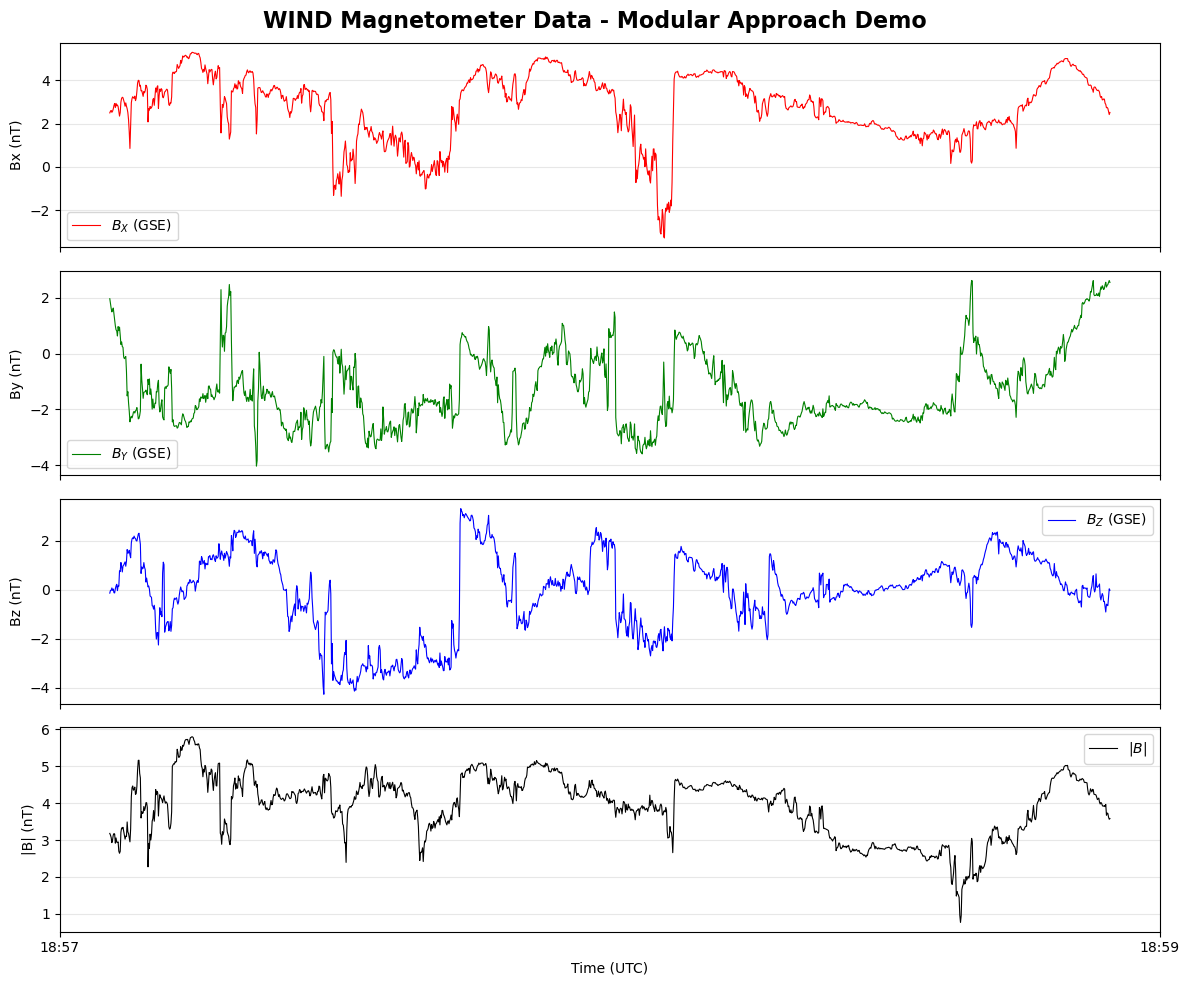

🎨 Individual component plots complete!


In [4]:
# Create figure with subplots
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
fig.suptitle('WIND Magnetometer Data - Modular Approach Demo', fontsize=16, fontweight='bold')

# Convert to matplotlib datetime format for plotting
times = mdates.date2num(wind_data.datetime_array)

# Plot Bx component
axes[0].plot(times, wind_data.bx_gse.data, 
             color=wind_data.bx_gse.plot_options['color'], 
             label=wind_data.bx_gse.plot_options['legend_label'],
             linewidth=0.8)
axes[0].set_ylabel(wind_data.bx_gse.plot_options['y_label'])
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot By component
axes[1].plot(times, wind_data.by_gse.data, 
             color=wind_data.by_gse.plot_options['color'], 
             label=wind_data.by_gse.plot_options['legend_label'],
             linewidth=0.8)
axes[1].set_ylabel(wind_data.by_gse.plot_options['y_label'])
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Plot Bz component
axes[2].plot(times, wind_data.bz_gse.data, 
             color=wind_data.bz_gse.plot_options['color'], 
             label=wind_data.bz_gse.plot_options['legend_label'],
             linewidth=0.8)
axes[2].set_ylabel(wind_data.bz_gse.plot_options['y_label'])
axes[2].legend()
axes[2].grid(True, alpha=0.3)

# Plot magnitude (calculated variable)
axes[3].plot(times, wind_data.bmag.data, 
             color=wind_data.bmag.plot_options['color'], 
             label=wind_data.bmag.plot_options['legend_label'],
             linewidth=0.8)
axes[3].set_ylabel(wind_data.bmag.plot_options['y_label'])
axes[3].legend()
axes[3].grid(True, alpha=0.3)

# Format x-axis
axes[3].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axes[3].xaxis.set_major_locator(mdates.HourLocator(interval=3))
axes[3].set_xlabel('Time (UTC)')

plt.tight_layout()
plt.show()

print("🎨 Individual component plots complete!")



🔍 Testing the problematic conda search command:
   Command: conda search conda | grep -E '^conda\s' | tail -n 1
   Timeout: 15 seconds
   Time taken: 2.38 seconds
   Return code: 0
   ✅ Success
   Output: 'conda                         25.5.1  py39hca03da5_0  pkgs/main'

RECOMMENDATION: If the conda search command timed out,
modify the script to skip the version check or use offline mode.



🔍 Testing the problematic conda search command:
   Command: conda search conda | grep -E '^conda\s' | tail -n 1
   Timeout: 15 seconds
   Time taken: 2.38 seconds
   Return code: 0
   ✅ Success
   Output: 'conda                         25.5.1  py39hca03da5_0  pkgs/main'

RECOMMENDATION: If the conda search command timed out,
modify the script to skip the version check or use offline mode.
